In [1]:
!pip install scikit-learn==0.23.1

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
med_df = pd.read_csv("azcabgptca.csv")

In [87]:
med_df.head(10)

,Unnamed: 0,died,procedure,age,gender,los,type
0,1,0,1,73,0,51,0
1,2,0,0,67,0,30,1
2,3,0,1,69,0,43,0
3,4,0,1,65,0,32,0
4,5,0,1,79,0,42,1
5,6,0,1,68,0,33,1
6,7,0,0,74,0,22,1
7,8,0,1,66,0,30,1
8,9,0,1,66,0,30,0
9,10,0,0,65,1,9,1


In [88]:
med_df.shape

(1959, 7)

In [89]:
med_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1959 entries, 0 to 1958
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  1959 non-null   int64
 1   died        1959 non-null   int64
 2   procedure   1959 non-null   int64
 3   age         1959 non-null   int64
 4   gender      1959 non-null   int64
 5   los         1959 non-null   int64
 6   type        1959 non-null   int64
dtypes: int64(7)
memory usage: 107.3 KB


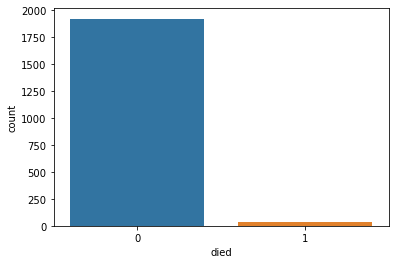

In [90]:
sns.countplot(x=med_df["died"]);

In [60]:
# capture the target column ("died") into separate vectors for training set and test set
X = med_df.drop(["died","Unnamed: 0"] , axis=1)
y = med_df.pop("died")

In [61]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X, y, test_size=.30, random_state=0)

In [22]:
# Ensemble RandomForest Classifier

In [62]:
rfcl = RandomForestClassifier(n_estimators = 500, 
                              oob_score=True,
                             )

In [63]:
rfcl = rfcl.fit(X_train, train_labels)

In [64]:
rfcl.oob_score

True

In [65]:
rfcl.oob_score_

0.9788475565280816

In [66]:
ytrain_predict = rfcl.predict(X_train)
ytest_predict = rfcl.predict(X_test)

In [67]:
from sklearn.metrics import confusion_matrix,classification_report

In [68]:
confusion_matrix(train_labels,ytrain_predict)

array([[1346,    0],
       [  10,   15]], dtype=int64)

In [69]:
confusion_matrix(test_labels,ytest_predict)

array([[575,   2],
       [  6,   5]], dtype=int64)

In [70]:
print(classification_report(train_labels,ytrain_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1346
           1       1.00      0.60      0.75        25

    accuracy                           0.99      1371
   macro avg       1.00      0.80      0.87      1371
weighted avg       0.99      0.99      0.99      1371



In [71]:
print(classification_report(test_labels,ytest_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       577
           1       0.71      0.45      0.56        11

    accuracy                           0.99       588
   macro avg       0.85      0.73      0.77       588
weighted avg       0.98      0.99      0.98       588



In [72]:
import matplotlib.pyplot as plt

AUC: 0.998


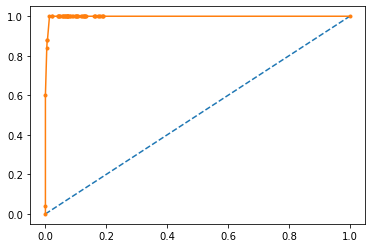

In [73]:
# AUC and ROC for the training data

# predict probabilities
probs = rfcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(train_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(train_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.790


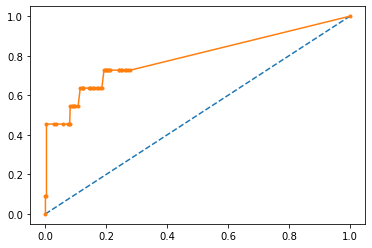

In [74]:
# AUC and ROC for the test data


# predict probabilities
probs = rfcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(test_labels, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(test_labels, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()